In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from scipy.optimize import curve_fit

In [36]:
dfii = pd.read_excel('grb_data.xlsx')
dfii['GRB Name'] = 'GRB' + dfii['GRB Name'].astype(str)

In [38]:
# Eiso=4πD_L^2F/(1+z)
dfii['Eiso'] = 4*np.pi*dfii['Fluence']*((dfii['Luminosity Distance'])**2)/(1+dfii['Redshift'])

In [39]:
# Lpeak = 4𝜋*(𝐷𝐿(𝑧, Ω𝑀, ΩΛ) ^2)*𝐹peak,
dfii['Lpeak'] = 4*np.pi*((dfii['Luminosity Distance'])**2)*dfii['PeakFlux']

In [37]:
dfii['Luminosity Distance'] = cosmo.luminosity_distance(dfii['Redshift'])
dfii['Rest Frame Epeak'] = (1 + dfii['Redshift'])*dfii['Epeak']
dfii['Z'] = 1 + dfii['Redshift']

In [104]:
SEEs = pd.read_csv('SEEs.csv')
SEEs['Gamma Ray Burst'] = 'GRB' + SEEs['Gamma Ray Burst'].astype(str)
SEEs = SEEs.rename(columns={"Gamma Ray Burst": "GRB Name", 'Z':'z'})
SEEs['GRB Name'] = SEEs['GRB Name'].str.strip()
SEEs['Z'] = 1+SEEs['z']
SEEs['Luminosity Distance'] = cosmo.luminosity_distance(SEEs['z'])
SEEs = SEEs.replace('pl', 'NaN')
SEEs['Epeak in Cutoff Power Law (keV)'] = SEEs['Epeak in Cutoff Power Law (keV)'].astype(float)

In [116]:
SEEs['Rest Frame Epeak'] = SEEs['Z']*SEEs['Epeak in Cutoff Power Law (keV)']
SEEs['Eiso'] = 4*np.pi*SEEs['Energy Flux 15-150 KeV (erg/em^2/s']*((SEEs['Luminosity Distance'])**2)/(SEEs['Z'])

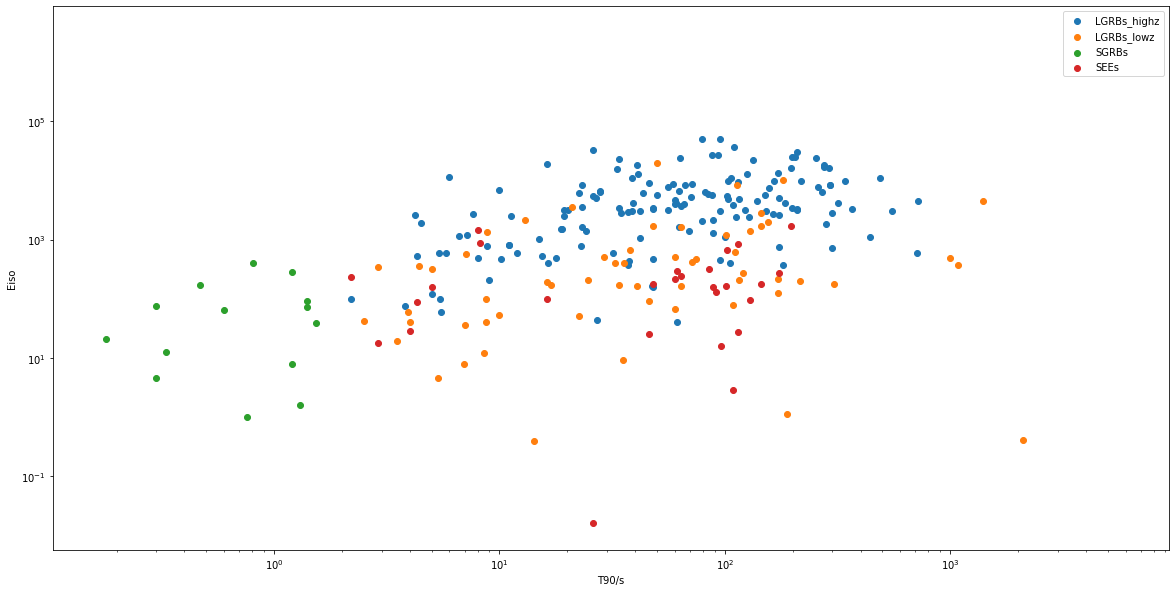

In [109]:
plt.figure(figsize=(20,10)) #sets figure size
LGRBs = dfii.loc[dfii['T90']>2]
LGRBs_highz = dfii.loc[(dfii['T90']> 2) & (dfii['Redshift']>1)]
LGRBs_lowz = dfii.loc[(dfii['T90']> 2) & (dfii['Redshift']<1)]
SGRBs = dfii.loc[(dfii['T90'] < 2)]

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.scatter(LGRBs_highz['T90'], LGRBs_highz['Eiso'])
plt.scatter(LGRBs_lowz['T90'], LGRBs_lowz['Eiso'])
plt.scatter(SGRBs['T90'], SGRBs['Eiso'])
plt.scatter(SEEs['T90 (s)'], SEEs['Eiso'])

plt.xlabel('T90/s')
plt.ylabel('Eiso')
plt.legend(['LGRBs_highz','LGRBs_lowz','SGRBs', 'SEEs'])

plt.show()

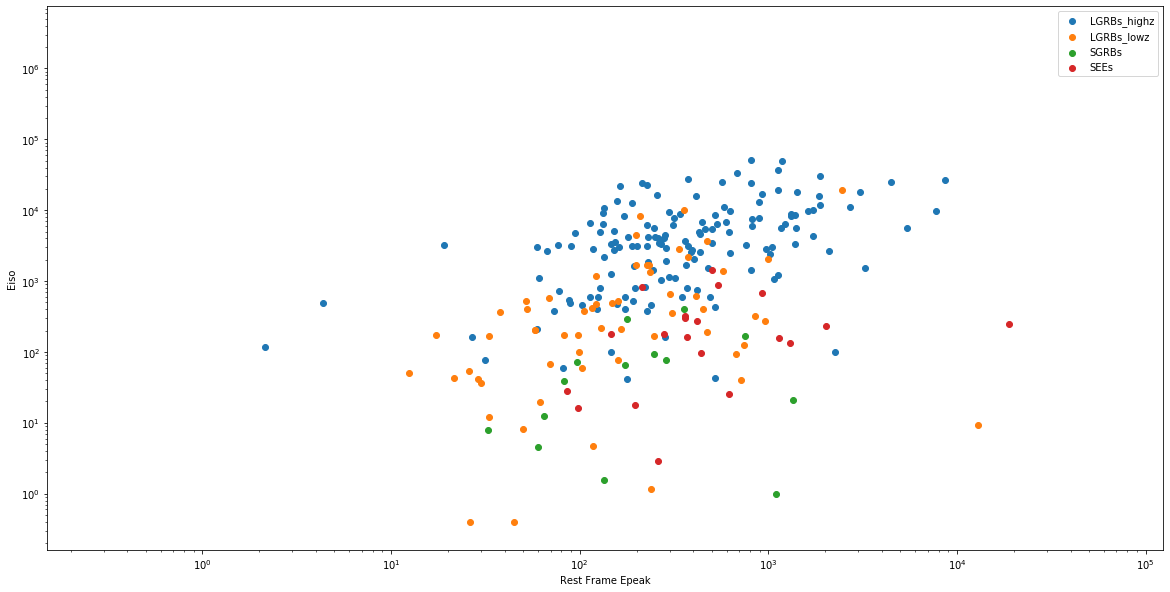

In [114]:
plt.figure(figsize=(20,10)) #sets figure size

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.scatter(LGRBs_highz['Rest Frame Epeak'], LGRBs_highz['Eiso'])
plt.scatter(LGRBs_lowz['Rest Frame Epeak'], LGRBs_lowz['Eiso'])
plt.scatter(SGRBs['Rest Frame Epeak'], SGRBs['Eiso'])
plt.scatter(SEEs['Rest Frame Epeak'], SEEs['Eiso'])
plt.xlabel('Rest Frame Epeak')
plt.ylabel('Eiso')
plt.legend(['LGRBs_highz','LGRBs_lowz', 'SGRBs', "SEEs"])

plt.show()

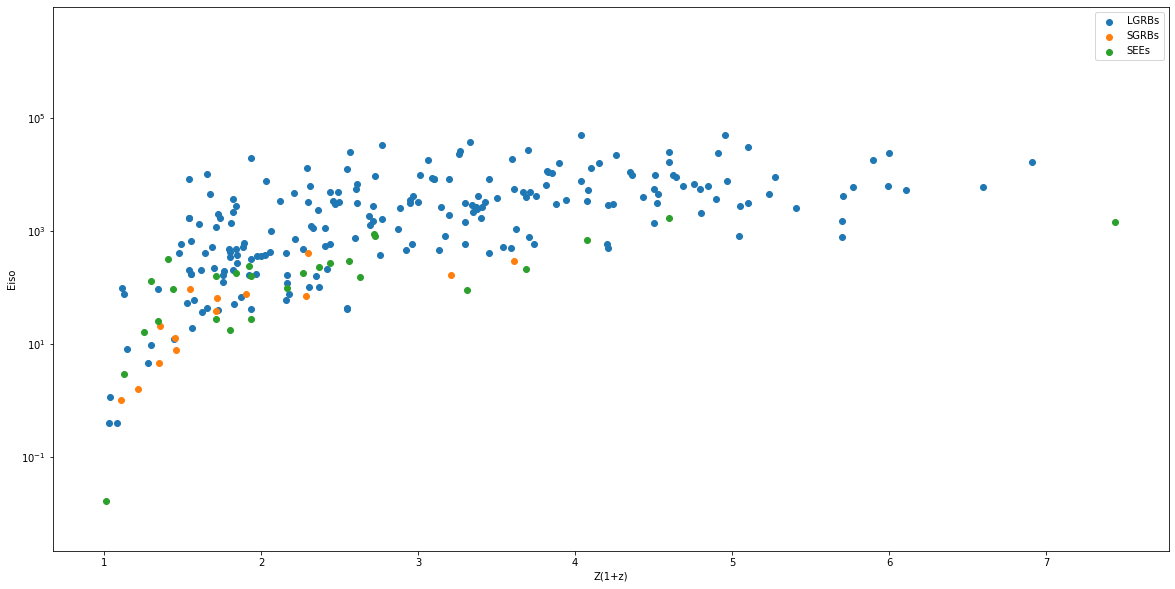

In [117]:
plt.figure(figsize=(20,10)) #sets figure size

ax = plt.gca()
ax.set_yscale('log')

plt.scatter(LGRBs['Z'], LGRBs['Eiso'])
plt.scatter(SGRBs['Z'], SGRBs['Eiso'])
plt.scatter(SEEs["Z"], SEEs["Eiso"])

plt.xlabel('Z(1+z)')
plt.ylabel('Eiso')
plt.legend(['LGRBs','SGRBs', 'SEEs'])

plt.show()

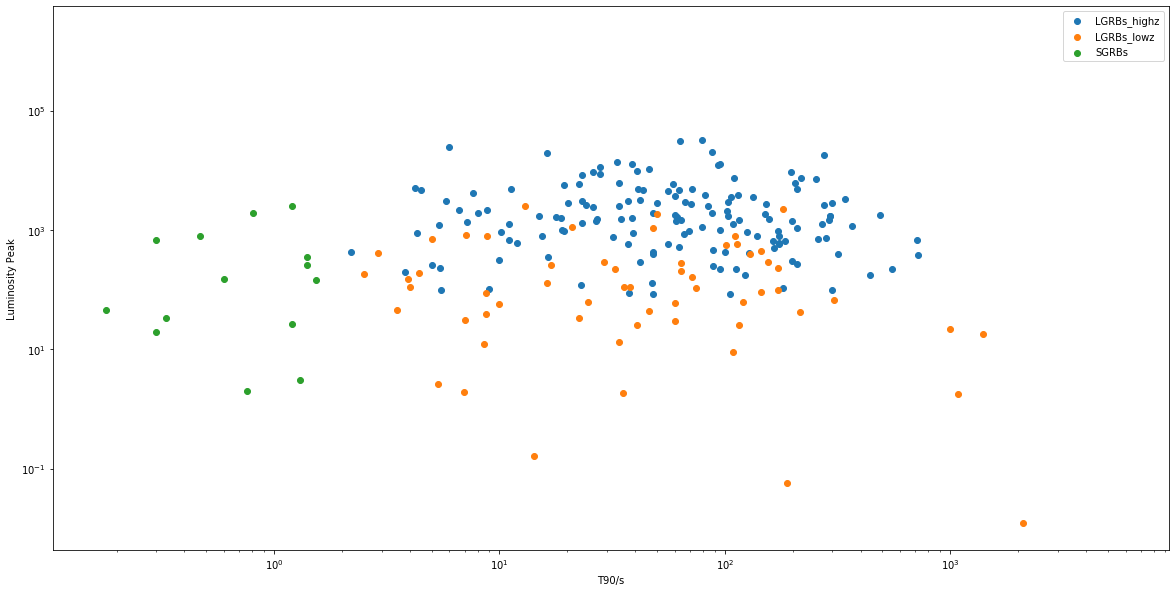

In [43]:
plt.figure(figsize=(20,10)) #sets figure size

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.scatter(LGRBs_highz['T90'], LGRBs_highz['Lpeak'])
plt.scatter(LGRBs_lowz['T90'], LGRBs_lowz['Lpeak'])
plt.scatter(SGRBs['T90'], SGRBs['Lpeak'])

plt.xlabel('T90/s')
plt.ylabel('Luminosity Peak')
plt.legend(['LGRBs_highz','LGRBs_lowz', 'SGRBs'])

plt.show()

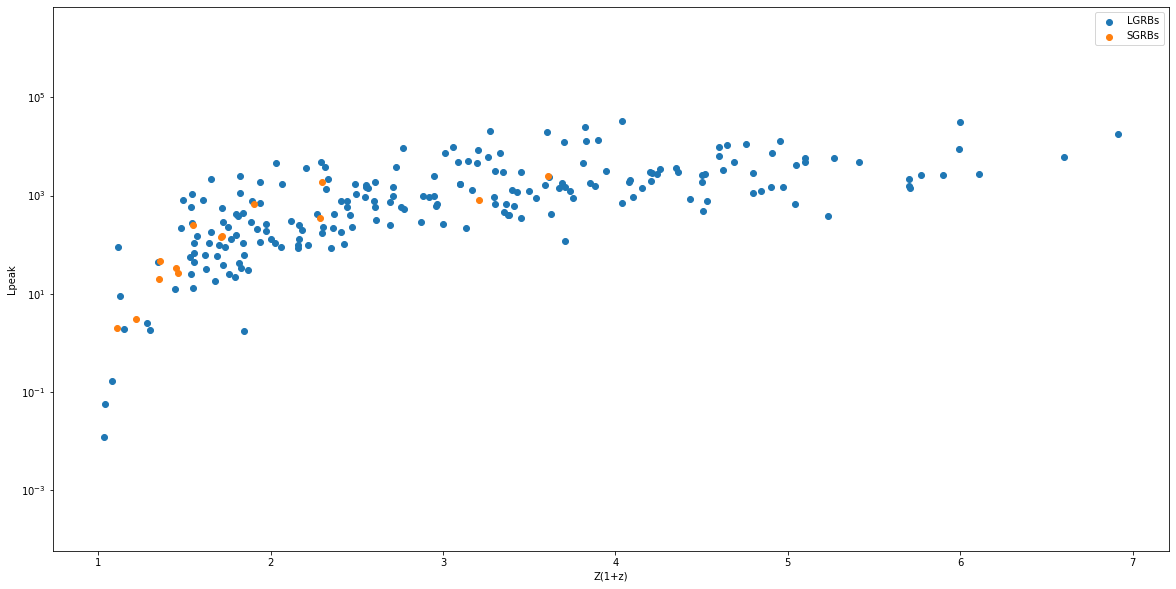

In [118]:
plt.figure(figsize=(20,10)) #sets figure size

ax = plt.gca()
ax.set_yscale('log')

plt.scatter(LGRBs['Z'], LGRBs['Lpeak'])
plt.scatter(SGRBs['Z'], SGRBs['Lpeak'])

plt.xlabel('Z(1+z)')
plt.ylabel('Lpeak')
plt.legend(['LGRBs','SGRBs'])

plt.show()